In [2]:
import pandas as pd 
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
project1 = pd.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv')

QUESTION 1: is there a relationship between day of week and Flight delay time? more precisely i would like to see if weekend makes a difference in delay time.

Question 2: My second question is in which airport you have more chance to have a departure delay?

Question 3:  What Is the relationship between the day of the week you take your flight and the taxi out ?

In [3]:
project1

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,NaN,0
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,-1.0,-1.0,IAH,DFW,224,12.0,15.0,0,NaN,0
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,-16.0,-5.0,IAH,DFW,224,7.0,12.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


QUESTION 1: is there a relationship between day of week and Flight delay time? more precisely i would like to see if weekend makes a difference in delay time.

Question 2: My second question is in which airport you have more chance to have a departure delay?

Question 3: If your flight is at IAH, what are the chance to have a departure delay greater than 10?

In [5]:
Week_Delay_Data=[]
Week_Delay_times=[]
for i in range(1,8):
    day_delay_data=project1.loc[project1['DayOfWeek']==i,['ArrDelay']]
    Week_Delay_Data.append(day_delay_data.mean()[0])
    Week_Delay_times.append((day_delay_data>0).sum()[0])
print(Week_Delay_Data)
print(Week_Delay_times)

[7.915456874466268, 6.68615649183147, 0.7421276595744681, 6.855592966704078, 3.8619728128267687, 3.0426784400294333, 6.070234113712375]
[1885, 1183, 859, 1305, 1201, 1238, 1591]


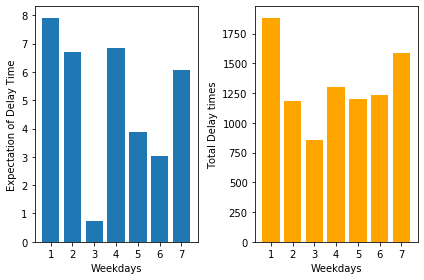

In [7]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
x=[i for i in range(1,8)]
plt.subplot(1,2,1)
plt.xticks(x)
plt.bar(x,Week_Delay_Data)
plt.ylabel('Expectation of Delay Time')
plt.xlabel('Weekdays')
plt.subplot(1,2,2)
plt.xticks(x)
plt.bar(x,Week_Delay_times,color="orange")
plt.ylabel('Total Delay times')
plt.xlabel('Weekdays')
plt.show()

From the graph we see that weekend is not a good reason for the flight delay because
 the expected delay time as well as the total delay times on Saturday and Sunday is 
even less than that of Monday.
In addition, we could observe from the graph that though Wednesday has the least expected 
value for delay time, it also has a lot of positive delay times, this indicates 
that there should also be a lot of departure in advance on Wednesday.

In [13]:
#This code creates new comumn, one call realdeparturedelay we will assume that a real dep delay is when the deparure delay is greater than 0.
#Thus from this column we will create to other column that will say in function of the airport if they have a relat dep delay. 
import numpy as np 

project1['realdeparturedelay'] = np.where(project1['DepDelay']>0,'late', 'on_time')
project1['late_HOU'] = (project1['Origin'] == "HOU") & (project1['realdeparturedelay'] == "late")
project1['late_IAH'] = (project1['Origin'] == "IAH") & (project1['realdeparturedelay'] == "late")


project1

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,realdeparturedelay,late_HOU,late_IAH
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,DFW,224,7.0,13.0,0,NaN,0,on_time,False,False
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,DFW,224,6.0,9.0,0,NaN,0,late,False,True
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,DFW,224,5.0,17.0,0,NaN,0,on_time,False,False
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,DFW,224,9.0,22.0,0,NaN,0,late,False,True
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,DFW,224,9.0,9.0,0,NaN,0,late,False,True
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,DFW,224,6.0,13.0,0,NaN,0,on_time,False,False
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,DFW,224,12.0,15.0,0,NaN,0,on_time,False,False
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,DFW,224,7.0,12.0,0,NaN,0,on_time,False,False
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,DFW,224,8.0,22.0,0,NaN,0,late,False,True
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,DFW,224,6.0,19.0,0,NaN,0,late,False,True


In [15]:
#this code will display only the column that I need to answer my question.
project1[['Origin','DepDelay', 'realdeparturedelay','late_HOU','late_IAH']]

,Origin,DepDelay,realdeparturedelay,late_HOU,late_IAH
0,IAH,0.0,on_time,False,False
1,IAH,1.0,late,False,True
2,IAH,-8.0,on_time,False,False
3,IAH,3.0,late,False,True
4,IAH,5.0,late,False,True
5,IAH,-1.0,on_time,False,False
6,IAH,-1.0,on_time,False,False
7,IAH,-5.0,on_time,False,False
8,IAH,43.0,late,False,True
9,IAH,43.0,late,False,True


In [17]:
#the two following will give me the size in order to give me a first idea, of which airport have the more delay 
project1.groupby('late_HOU').size()

late_HOU
False    17186
True      2814
dtype: int64

In [18]:
project1.groupby('late_IAH').size()

late_IAH
False    12782
True      7218
dtype: int64

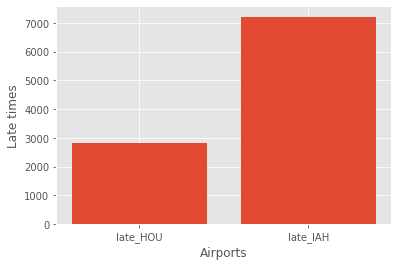

In [88]:
my_xticks=['late_HOU','late_IAH']
x=[0,1]
y=[project1['late_HOU'].value_counts()[1],project1['late_IAH'].value_counts()[1]]
plt.xticks(x, my_xticks)
plt.bar(x,y)
plt.ylabel('Late times')
plt.xlabel('Airports')
plt.show()


With the help of the graph and the calcul of the size we can see that you have greater chance to be late if your a traveling from IAH.

In [70]:
#this descriptive statistic will help me to have an idea of the distribution of the taxi out.
project1['TaxiOut'].describe()

count    19780.000000
mean        15.134328
std          7.046056
min          4.000000
25%         10.000000
50%         14.000000
75%         18.000000
max         78.000000
Name: TaxiOut, dtype: float64

In [67]:
#this command will show only the column that I need to answer my question 
c=project1[['DayOfWeek','TaxiOut']]
c  

,DayOfWeek,TaxiOut
0,6,13.0
1,7,9.0
2,1,17.0
3,2,22.0
4,3,9.0
5,4,13.0
6,5,15.0
7,6,12.0
8,7,22.0
9,1,19.0


In [79]:
#This is the corelation od Day of the week and Taxi out 
c.corr()

,DayOfWeek,TaxiOut
DayOfWeek,1.000000,-0.062055
TaxiOut,-0.062055,1.000000


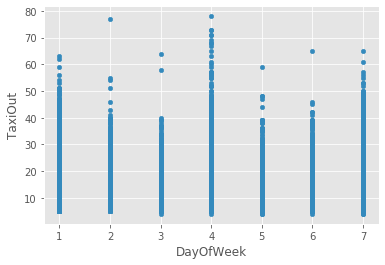

In [87]:
project1.plot.scatter(x='DayOfWeek', y='TaxiOut')

From the correlation we can see that there is a small negative correlation, meaning that as the days in the week increase the time of taxiou will decrease. 
Indeed from yhe graph we can se that the first bars that corresponds to the beginning of the week have a time of taxiout that go above 70 whereas for the 3 last  days of the week the taxi out does not go aove 70.
Thus we can conclude that there is a relationship between weekday and taxiout, however this relation is very small.